In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
# Question #3: Conceptual part

In [3]:
income = 50+20*4.0+0.07*110+0.01*(4.0/110)-10*(4.0/1)
print("Income is", income)

Income is 97.70036363636362


In [4]:
# Question #10: Applied part

In [5]:
df = pd.read_csv('Carseats.csv')

In [6]:
# Fitting a model as generalised linear regression.
# Since both Urban and US are dichotomous variables, I decided to use same strategy as in reading material for Lesson 2.
# In this exercise I am using "formula = Sales ~ Price + Urban + US"

In [7]:
formula="Sales ~ Price + Urban + US"
mod=ols(formula,data=df)
res=mod.fit()
print(res.summary())
mod2=ols(formula,data=df).fit()
table=sm.stats.anova_lm(mod2)
print(table)
print("\n\nConfidence intervals")
print(mod2.conf_int())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           2.39e-23
Time:                        05:42:41   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036   

In [8]:
# Coeficient for the "Price" is -0.0545 and indicates that smaller price leaads to higher sales numbers.
# Cefisient for "US" is 1.2006 and indicates that it is main contribution factor in this model.
# Coefficient for "Urban" is -0.0219, what indicates that it is the least contribution variable.
# "Sales" and "Price" are numerical variables, "Urban" and "US" are dichotomous.
# Residuals degrees of freedom is 396, model degrees of freedome is 3, 399 total, what corresponds to degrees of freedom in the dataset.
# R-squared is 0.239 and adjusted R-squared 0.234, which is low. F-statistic is 41.52 with probability 2.39e-23.
# Overall impression is that a better model is needed in this case.
# If a betta for a variable is 0 variable is not contributing to the outcome. Neither of these variables have coeficient of 0 and we can reject . 

In [9]:
# I will us "US" and "Price" in a smaller model with formula "Sales ~ Price + US"

In [10]:
formula="Sales ~ Price + US"
mod=ols(formula,data=df)
res=mod.fit()
print(res.summary())
mod2=ols(formula,data=df).fit()
table=sm.stats.anova_lm(mod2)
print(table)
print("\n\nConfidence intervals")
print(mod2.conf_int())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           2.66e-24
Time:                        05:42:41   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

In [11]:
# Both models are practically the same, I excluded "Urban" vavriable because it is not likely to comtribute anything to the model, although, smaller model has high Log-likelihood.

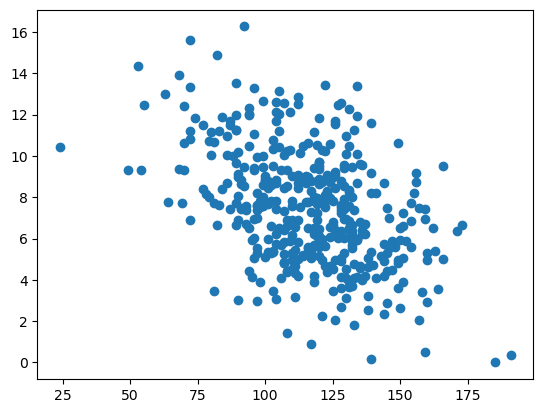

In [12]:
# Both "Urban" and "US" are dichotomous, only "Price" variable is numerical
# Visualizing prediction
plt.pyplot.scatter(df["Price"],df["Sales"], label='Original model')

In [14]:
# From the plot it does not appear that dataset have any outliers or significant contributors.